# Notes: Data Manipulation with Pandas

Sample data is installed from kaggle: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

## Ch1: Data Manipulation

In [66]:
import pandas as pd

## import csv file
df_full = pd.read_csv("student_habits_performance.csv")
print(df_full.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [67]:
## Select specific columns of dataframe
df = df_full[["student_id", "age", "gender","study_hours_per_day","social_media_hours"]]
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours
0      S1000   23  Female                  0.0                 1.2
1      S1001   20  Female                  6.9                 2.8
2      S1002   21    Male                  1.4                 3.1
3      S1003   23  Female                  1.0                 3.9
4      S1004   19  Female                  5.0                 4.4


In [68]:
## print basic information of dataframe

print(df.columns, "\n")
print(df.shape)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours'],
      dtype='object') 

(1000, 5)


In [69]:
## Conditional subset 

female_df_high = df[(df["gender"]=="Female") & (df["social_media_hours"]>=5)]
print(female_df_high.head())

    student_id  age  gender  study_hours_per_day  social_media_hours
58       S1058   19  Female                  2.2                 5.0
145      S1145   23  Female                  2.2                 6.2
311      S1311   23  Female                  2.6                 5.3
368      S1368   19  Female                  2.8                 5.0
384      S1384   21  Female                  2.6                 5.4


In [70]:
## Sort by age then social_media_hours 

female_df_high = female_df_high.sort_values(["age", "social_media_hours"], ascending=[True, False])
print(female_df_high)

    student_id  age  gender  study_hours_per_day  social_media_hours
678      S1678   18  Female                  3.5                 5.2
414      S1414   19  Female                  4.2                 5.6
58       S1058   19  Female                  2.2                 5.0
368      S1368   19  Female                  2.8                 5.0
384      S1384   21  Female                  2.6                 5.4
145      S1145   23  Female                  2.2                 6.2
311      S1311   23  Female                  2.6                 5.3
829      S1829   24  Female                  4.1                 5.4


In [71]:
## Count values of 'exercise_frequency'

print(df_full['exercise_frequency'].value_counts().sort_index())

exercise_frequency
0    144
1    146
2    122
3    153
4    134
5    149
6    152
Name: count, dtype: int64


## Ch2: Summary Statstics 

In [72]:
## mean, median, mode
print("mean age: ", df["age"].mean())
print("mode age: ", df["age"].mode())
print("median age: ", df["age"].median())

mean age:  20.498
mode age:  0    20
Name: age, dtype: int64
median age:  20.0


In [73]:
## Customize aggreate function

def spec(col):
    return (col.mean() ** 2)

print(df["age"].agg(spec))


420.16800400000005


In [74]:
### Cumsum

df_smh = df[["social_media_hours"]]
df_smh_cumsum = df_smh.cumsum()
df_smh.index = [x+1 for x in df_smh.index] # Reindex to start from 1
df_smh_cumsum.index = [x+1 for x in df_smh_cumsum.index] # Reindex to start from 1

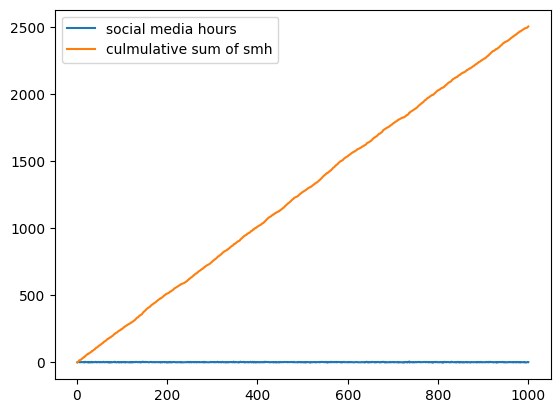

In [79]:
### Cumsum graph
import matplotlib.pyplot as plt
plt.plot(df_smh, label="social media hours")
plt.plot(df_smh_cumsum, label="culmulative sum of smh")
plt.legend()
plt.show()

In [88]:
## Drop duplicates 
df_unique_age_gender = df.drop_duplicates(subset=["age", "gender"])

## groupby (must need to use aggregate function otherwise it doesn't make sense)
print(df.groupby(["age", "gender"])["social_media_hours"].sum().head())

age  gender
17   Female    136.0
     Male      166.5
     Other      15.6
18   Female    160.5
     Male      143.0
Name: social_media_hours, dtype: float64


In [ ]:
## Only allow one age, gender pair
print(df_unique_age_gender.groupby(["age", "gender"])["social_media_hours"].sum().head())

age  gender
17   Female    2.2
     Male      2.5
     Other     3.1
18   Female    3.1
     Male      2.2
Name: social_media_hours, dtype: float64


### Pivot table parameters
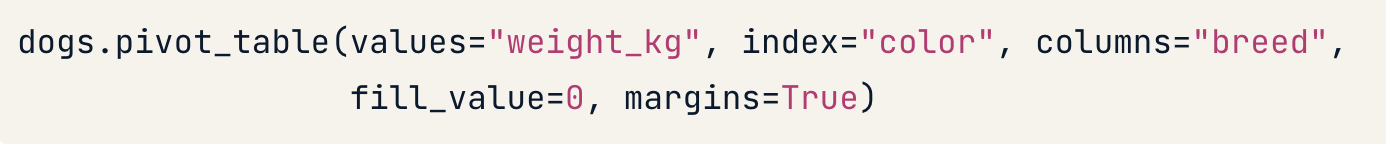

and aggfunc="mean"

In [98]:
import numpy as np

print(df.pivot_table(index="gender", values="social_media_hours")) # default aggfunc is mean
print("\n")
print(df.pivot_table(index="gender", values="social_media_hours", aggfunc=["sum", np.median, "max"])) # multiple aggfunc
print("\n")
print(df.pivot_table(index="gender", columns="age", values="social_media_hours")) # multiple columns

        social_media_hours
gender                    
Female            2.503950
Male              2.499371
Other             2.592857


                      sum             median                max
       social_media_hours social_media_hours social_media_hours
gender                                                         
Female             1204.4               2.50                6.2
Male               1192.2               2.50                7.2
Other               108.9               2.45                4.9


age           17        18        19        20        21        22        23  \
gender                                                                         
Female  2.344828  2.720339  2.372131  2.420270  2.547619  2.370000  2.515686   
Male    2.413043  2.648148  2.636735  2.692308  2.574545  2.521569  2.374194   
Other   2.600000  2.375000  2.200000  3.142857  1.714286  2.300000  3.133333   

age           24  
gender            
Female  2.783636  
Male    2.237500  


/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_3155/1089519401.py:5: FutureWarning: The provided callable <function median at 0x10749f7e0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(df.pivot_table(index="gender", values="social_media_hours", aggfunc=["sum", np.median, "max"])) # multiple aggfunc


## Ch3: Indexs

In [99]:
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours
0      S1000   23  Female                  0.0                 1.2
1      S1001   20  Female                  6.9                 2.8
2      S1002   21    Male                  1.4                 3.1
3      S1003   23  Female                  1.0                 3.9
4      S1004   19  Female                  5.0                 4.4


In [100]:
## set index as student_id
print(df.set_index("student_id").head())

            age  gender  study_hours_per_day  social_media_hours
student_id                                                      
S1000        23  Female                  0.0                 1.2
S1001        20  Female                  6.9                 2.8
S1002        21    Male                  1.4                 3.1
S1003        23  Female                  1.0                 3.9
S1004        19  Female                  5.0                 4.4


In [102]:
## set index as (student_id, gender) 
print(df.set_index(["student_id", "gender"]).head())

                   age  study_hours_per_day  social_media_hours
student_id gender                                              
S1000      Female   23                  0.0                 1.2
S1001      Female   20                  6.9                 2.8
S1002      Male     21                  1.4                 3.1
S1003      Female   23                  1.0                 3.9
S1004      Female   19                  5.0                 4.4


In [109]:
## use .loc to get value directly
df_sid = df.set_index("student_id")
df_sid.loc["S1003"]

age                        23
gender                 Female
study_hours_per_day       1.0
social_media_hours        3.9
Name: S1003, dtype: object

In [110]:
## sort index by level and ascedning
df_sid_gen = df.set_index(["student_id", "gender"])
df_sorted_sid_gen = df_sid_gen.sort_index(level=["student_id", "gender"], ascending=[False, True])
print(df_sorted_sid_gen.head())

                   age  study_hours_per_day  social_media_hours
student_id gender                                              
S1999      Female   19                  4.3                 2.9
S1998      Male     24                  5.4                 4.1
S1997      Male     20                  3.0                 2.6
S1996      Female   17                  2.9                 1.0
S1995      Female   21                  2.6                 0.5


## Ch4: Slicing values

but for .iloc the final value is not included 

df.loc[r1:r3, c1:c3]


In [112]:
df_sid.head()

,age,gender,study_hours_per_day,social_media_hours
student_id,,,,
S1000,23,Female,0.0,1.2
S1001,20,Female,6.9,2.8
S1002,21,Male,1.4,3.1
S1003,23,Female,1.0,3.9
S1004,19,Female,5.0,4.4


In [121]:
print(df_sid.loc["S1000":"S1003"]) # includes final value
print(df_sid.iloc[0:3]) # does not include final value

            age  gender  study_hours_per_day  social_media_hours
student_id                                                      
S1000        23  Female                  0.0                 1.2
S1001        20  Female                  6.9                 2.8
S1002        21    Male                  1.4                 3.1
S1003        23  Female                  1.0                 3.9
            age  gender  study_hours_per_day  social_media_hours
student_id                                                      
S1000        23  Female                  0.0                 1.2
S1001        20  Female                  6.9                 2.8
S1002        21    Male                  1.4                 3.1


In [126]:
print(df_sid.loc["S1001":"S1003", "age":"gender"]) # 2D slicing 
print(df_sid.iloc[1:3, 0:1]) # .iloc 2D slicing omits last value

            age  gender
student_id             
S1001        20  Female
S1002        21    Male
S1003        23  Female
            age
student_id     
S1001        20
S1002        21


In [130]:
# mean of pivot tables
smh_by_age_gender = df.pivot_table(index="age", columns="gender", values="social_media_hours", aggfunc="mean")
print(smh_by_age_gender)

gender    Female      Male     Other
age                                 
17      2.344828  2.413043  2.600000
18      2.720339  2.648148  2.375000
19      2.372131  2.636735  2.200000
20      2.420270  2.692308  3.142857
21      2.547619  2.574545  1.714286
22      2.370000  2.521569  2.300000
23      2.515686  2.374194  3.133333
24      2.783636  2.237500  2.828571


In [134]:
# using .loc to get values
smh_by_age_gender.loc[17]

gender
Female    2.344828
Male      2.413043
Other     2.600000
Name: 17, dtype: float64

In [137]:
# mean of gender (compress rows)
print(smh_by_age_gender.mean(axis="rows"))

print("\n")

# mean of age (compress columns)
print(smh_by_age_gender.mean(axis="columns"))



gender
Female    2.509314
Male      2.512255
Other     2.536756
dtype: float64


age
17    2.452624
18    2.581162
19    2.402955
20    2.751812
21    2.278817
22    2.397190
23    2.674404
24    2.616569
dtype: float64


## Ch5: Visualising Dataframe
- hist, bar, line, scatter

In [139]:
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours
0      S1000   23  Female                  0.0                 1.2
1      S1001   20  Female                  6.9                 2.8
2      S1002   21    Male                  1.4                 3.1
3      S1003   23  Female                  1.0                 3.9
4      S1004   19  Female                  5.0                 4.4


In [144]:
study_sm_by_age = df.pivot_table(index="age", values=["study_hours_per_day","social_media_hours"], aggfunc="mean")
print(study_sm_by_age)

     social_media_hours  study_hours_per_day
age                                         
17             2.391729             3.547368
18             2.675214             3.623932
19             2.482301             3.457522
20             2.576027             3.569178
21             2.512800             3.452800
22             2.437168             3.602655
23             2.473109             3.575630
24             2.492537             3.569403


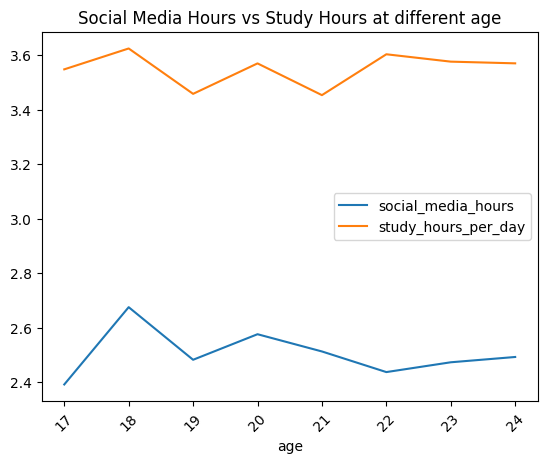

In [159]:
study_sm_by_age.plot(kind="line", rot=45, title="Social Media Hours vs Study Hours at different age")
plt.show()

In [151]:
study_by_gend = df.pivot_table(index="age", values="study_hours_per_day", columns="gender", aggfunc="mean")
print(study_by_gend)

gender    Female      Male     Other
age                                 
17      3.546552  3.594203  3.016667
18      3.884746  3.340741  3.600000
19      3.490164  3.475510  2.500000
20      3.644595  3.464615  3.742857
21      3.514286  3.347273  3.728571
22      3.633333  3.574510  3.400000
23      3.468627  3.600000  4.233333
24      3.454545  3.626389  3.885714


[]

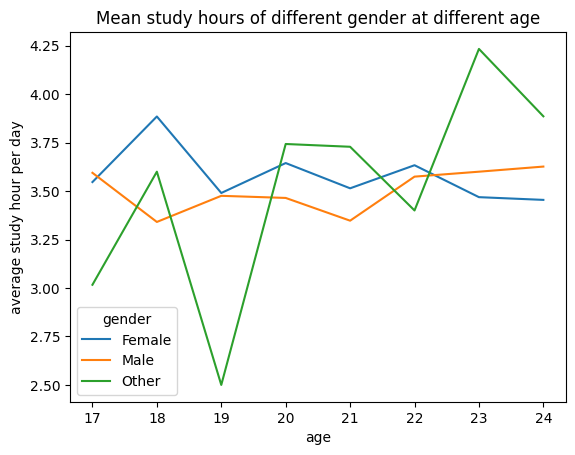

In [158]:
study_by_gend.plot(kind="line", title="Mean study hours of different gender at different age", ylabel="average study hour per day")
plt.plot()

## Ch6: Missing values
- .isna(), .isna().any(), .dropna(), .fillna(0)

In [162]:
print(df_full.isna().any())

student_id                       False
age                              False
gender                           False
study_hours_per_day              False
social_media_hours               False
netflix_hours                    False
part_time_job                    False
attendance_percentage            False
sleep_hours                      False
diet_quality                     False
exercise_frequency               False
parental_education_level          True
internet_quality                 False
mental_health_rating             False
extracurricular_participation    False
exam_score                       False
dtype: bool


student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


[]

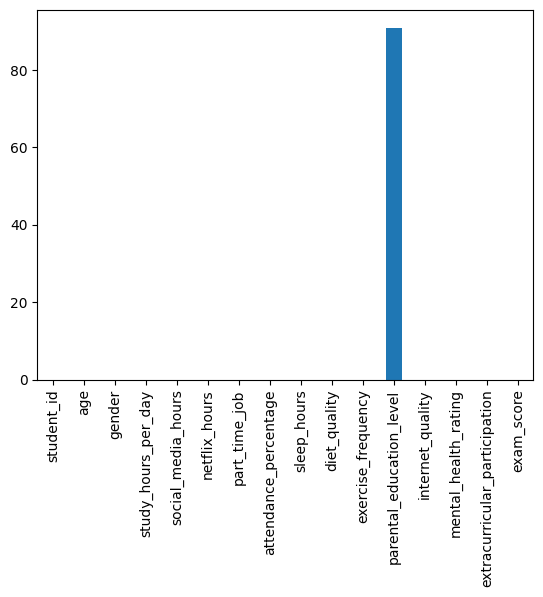

In [167]:
print(df_full.isna().sum())
df_full.isna().sum().plot(kind="bar")
plt.plot()

# Ch7: Creating Dataframes
1. From lists of dictionaries (each row entry)
2. From dictionaries of lists (each column entry)
3. Handling csv files: .read_csv(), .to_csv()

In [169]:
df.to_csv("short_student_habits_performance.csv")